In [ ]:
#Study https://towardsdatascience.com/basics-of-ohlc-charts-with-pythons-matplotlib-56d0e745a5be
# https://eodhistoricaldata.com/financial-academy/financial-faq/adjusted-close-and-close-whats-the-difference/
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime as dt
import random
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("/content/Prices.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [ ]:
#converting data to readable date by model
test_adj = df["Adj Close"].values.reshape(-1,1)
test_date = pd.to_datetime(df["Date"]).map(dt.datetime.toordinal).values.reshape(-1,1)
#Train-Test-Split
train_x, test_x , train_y, test_y = train_test_split(test_date,test_adj,train_size = 0.2,random_state=7)
#Linear regression without hyper parameters
lr = LinearRegression()
lr.fit(train_x,train_y)
#prediction of test data
pred_y = lr.predict(test_x)

In [ ]:
def reverse_time(x):
  return dt.date.fromordinal(int(x))

testing_date0 = list(map(reverse_time, test_date))
testing_date1 = list(map(reverse_time,train_x))
testing_date2 = list(map(reverse_time,test_x))

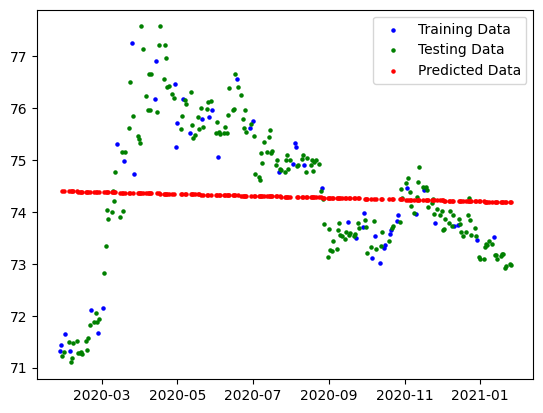

In [ ]:
#Plotting ot train, test, and regression line for Adj Close
plt.scatter(testing_date1,train_y,c="blue",s=5, label = "Training Data")
plt.scatter(testing_date2,test_y,c="green",s=5, label = "Testing Data")
plt.scatter(testing_date2,pred_y,c="red",s=5, label = "Predicted Data")
plt.legend()
plt.show()

In [ ]:
#Getting 10 random date as data points
random_dates = ["2021-01-28"]
for x in range(10):
  startdate=dt.date(2021,2,1, )
  date=startdate+dt.timedelta(random.randint(1,30))
  random_dates.append(date)

random_dates = pd.to_datetime(random_dates).map(dt.datetime.toordinal).values.reshape(-1,1)
pred_rand_dates = lr.predict(random_dates)

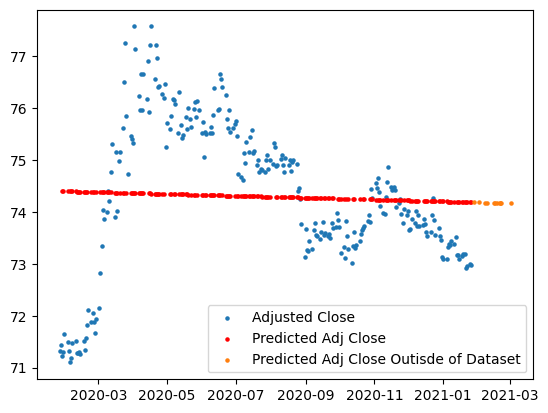

In [ ]:
testing_date3 = list(map(reverse_time,random_dates))
plt.scatter(testing_date0, df["Adj Close"],s=5, label = "Adjusted Close")
plt.scatter(testing_date2,pred_y,c="red",s=5, label = "Predicted Adj Close")
plt.scatter(testing_date3,pred_rand_dates,s=5, label = "Predicted Adj Close Outisde of Dataset")
plt.legend()
plt.show()

In [ ]:
#Showing OHLC graph
fig1 = go.Candlestick(x=testing_date0, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"],name="OHLC")
#Showing Adj Close line/ Values
fig2 = go.Scatter(x=testing_date1,y=train_y.flatten(),mode="markers",opacity=0.7, line = dict(color='royalblue', width=4, dash='dash'),name="Adj Close")
#Showing testPrediction
fig3 = go.Scatter(x=testing_date2,y=pred_y.flatten(),opacity=0.7, line = dict(color='green', width=4, dash='solid'),name="Predicted Adj Close")
#Showing Predicted Adj Close
fig4 = go.Scatter(x=testing_date3,y=pred_rand_dates.flatten(),opacity=0.7, line = dict(color='orange', width=4, dash='solid'),name="Predicted Adj Close of Random Date")

#Plotting
fig = make_subplots()
fig.add_trace(fig1)
fig.add_trace(fig2)
fig.add_trace(fig3)
fig.add_trace(fig4)
fig.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(test_y,pred_y)
mse = mean_squared_error(test_y,pred_y)
print(f"MAE = {mae} \nMSE = {mse}")

MAE = 1.1275138271842136 
MSE = 1.970480060410799
